We are going to implement an End-to-End project using Support Vector Machines to live Trade For us. You Probably must have Heard of the term stock market which is known to have made the lives of thousands and to have destroyed the lives of millions. If you are not familiar with the stock market you can surf some basic Stuff about markets.


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import StandardScaler
import pandas_ta as ta
import seaborn as sns

In [52]:
# converting the dataset into dataframe

dataframe_reliance_stock_price=pd.read_csv(r"D:\datasets2\RELIANCE.csv")
dataframe_reliance_stock_price

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-01-02,324.975006,313.000000,314.924988,321.600006,19847448.0,265.931763
1,2009-01-05,344.250000,323.774994,324.750000,341.462006,22027876.0,282.355743
2,2009-01-06,347.500000,332.812012,340.000000,342.725006,24118400.0,283.400116
3,2009-01-07,346.500000,293.750000,342.250000,300.187988,34002200.0,248.226151
4,2009-01-09,302.500000,273.412994,302.500000,288.312012,37952520.0,238.405838
...,...,...,...,...,...,...,...
2629,2019-09-09,1233.000000,1213.150024,1220.650024,1222.199951,5370758.0,1222.199951
2630,2019-09-11,1240.000000,1222.500000,1222.500000,1234.400024,5544468.0,1234.400024
2631,2019-09-12,1240.449951,1205.699951,1235.000000,1210.349976,5431139.0,1210.349976
2632,2019-09-13,1228.500000,1206.900024,1212.000000,1225.599976,5919260.0,1225.599976


In [53]:
# checking the missing values
dataframe_reliance_stock_price.isnull().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [54]:
# setting the date as the index and changing the format of date acc to my need
dataframe_reliance_stock_price['Date']=pd.to_datetime(dataframe_reliance_stock_price['Date'])
dataframe_reliance_stock_price['Date']=dataframe_reliance_stock_price['Date'].dt.strftime('%d-%m-%Y')
dataframe_reliance_stock_price.set_index('Date',inplace=True)

In [55]:
dataframe_reliance_stock_price['H-L']=dataframe_reliance_stock_price['High'] -dataframe_reliance_stock_price['Low']
dataframe_reliance_stock_price['O-C']=dataframe_reliance_stock_price['Close']-dataframe_reliance_stock_price['Open']

The difference between the high and low prices (H-L) gives an indication of the price range within which the stock traded during a particular period (e.g., a day). Higher differences imply higher volatility, which may present both opportunities and risks for traders and investors.

In technical analysis, the relationship between the open and close prices (O-C) is often used in candlestick charting. The difference helps to visualize whether the closing price was higher (bullish) or lower (bearish) than the opening price. This can provide insights into market sentiment and potential future price movements.

In [56]:
dataframe_reliance_stock_price['moving_average_20'] = dataframe_reliance_stock_price['Close'].rolling(window=20).mean()
dataframe_reliance_stock_price['moving_average_50'] = dataframe_reliance_stock_price['Close'].rolling(window=50).mean()

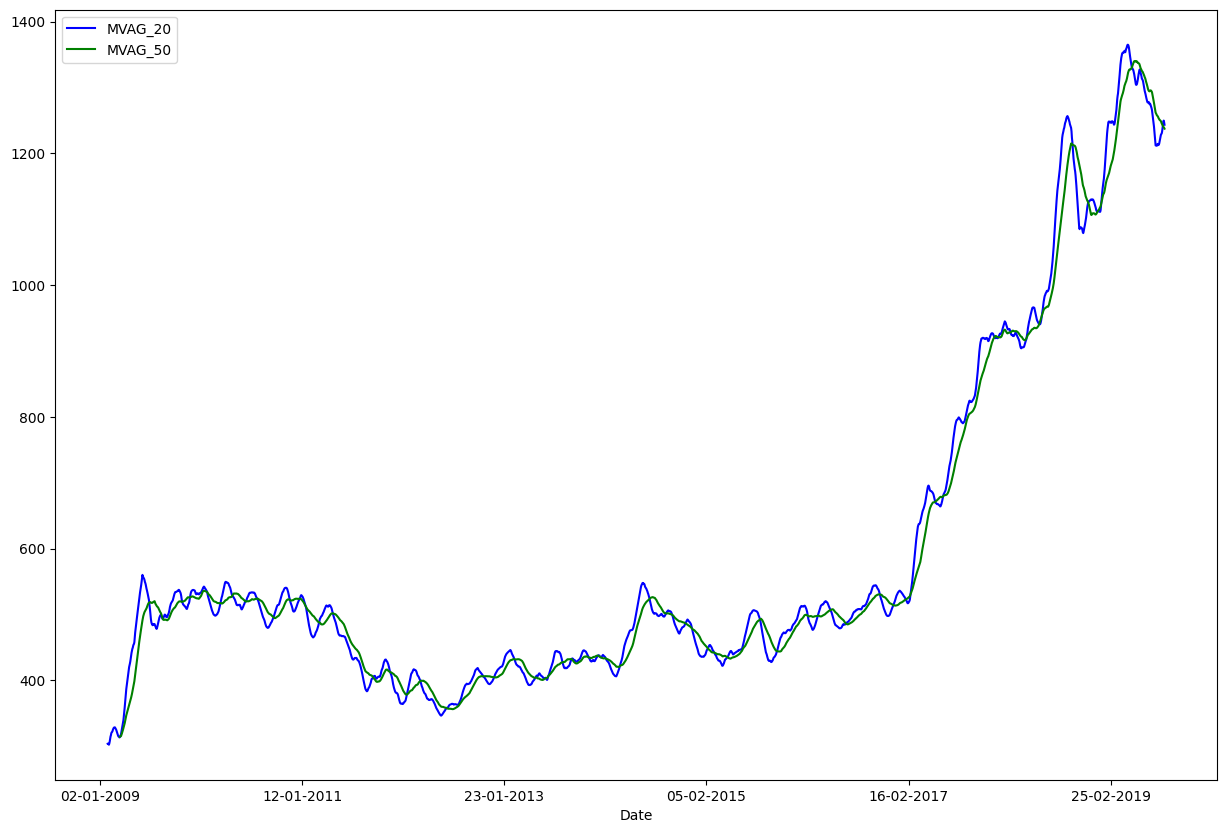

In [57]:
#dataframe_reliance_stock_price['Close'].plot(label='Reliance', figsize=(15,10), title='Closing Price vs Moving Average', color='red', linewidth=1.0, grid=True)
plt.figure(figsize=(15,10))
dataframe_reliance_stock_price['moving_average_20'].plot(label='MVAG_20', color='blue')
dataframe_reliance_stock_price['moving_average_50'].plot(label='MVAG_50', color='green')
plt.legend()

Moving Average (MA): It represents the average price of a security over a specific period, continuously recalculated as new data becomes available.

Moving Average Window: This is the number of data points (in this case, days) used to calculate the average. For example, a 5-day moving average calculates the average of the last 5 days' closing prices.

Interpretation: Moving averages help to identify trends by smoothing out short-term fluctuations in price data. When the short-term moving average crosses above the long-term moving average, it may indicate a bullish trend, while a crossover in the opposite direction may suggest a bearish trend.

In [58]:
dataframe_reliance_stock_price['EWMA_12'] = dataframe_reliance_stock_price['Close'].ewm(span=12).mean()
dataframe_reliance_stock_price['standard_devaition_20'] = dataframe_reliance_stock_price['Close'].rolling(window=20).std()
dataframe_reliance_stock_price['standard_devaition_50'] = dataframe_reliance_stock_price['Close'].rolling(window=50).std()

EWMA: Similar to traditional moving averages, EWMA smoothes out price data, but it gives more weight to recent prices. It's useful for identifying trends and detecting changes in momentum.

Standard Deviation: Standard deviation is often used as a measure of volatility. Higher standard deviations indicate greater price variability, which can help traders and investors assess risk levels and make informed decisions.

In [59]:
# Calculate RSI
dataframe_reliance_stock_price['RSI'] = ta.rsi(dataframe_reliance_stock_price['Close'], length=14)

# Calculate Williams %R
dataframe_reliance_stock_price['Williams %R'] = ta.willr(dataframe_reliance_stock_price['High'], dataframe_reliance_stock_price['Low'], dataframe_reliance_stock_price['Close'], length=7)

# Display the updated DataFrame
print(dataframe_reliance_stock_price)

                   High          Low         Open        Close      Volume  \
Date                                                                         
02-01-2009   324.975006   313.000000   314.924988   321.600006  19847448.0   
05-01-2009   344.250000   323.774994   324.750000   341.462006  22027876.0   
06-01-2009   347.500000   332.812012   340.000000   342.725006  24118400.0   
07-01-2009   346.500000   293.750000   342.250000   300.187988  34002200.0   
09-01-2009   302.500000   273.412994   302.500000   288.312012  37952520.0   
...                 ...          ...          ...          ...         ...   
09-09-2019  1233.000000  1213.150024  1220.650024  1222.199951   5370758.0   
11-09-2019  1240.000000  1222.500000  1222.500000  1234.400024   5544468.0   
12-09-2019  1240.449951  1205.699951  1235.000000  1210.349976   5431139.0   
13-09-2019  1228.500000  1206.900024  1212.000000  1225.599976   5919260.0   
16-09-2019  1219.099976  1186.099976     0.000000  1210.750000  

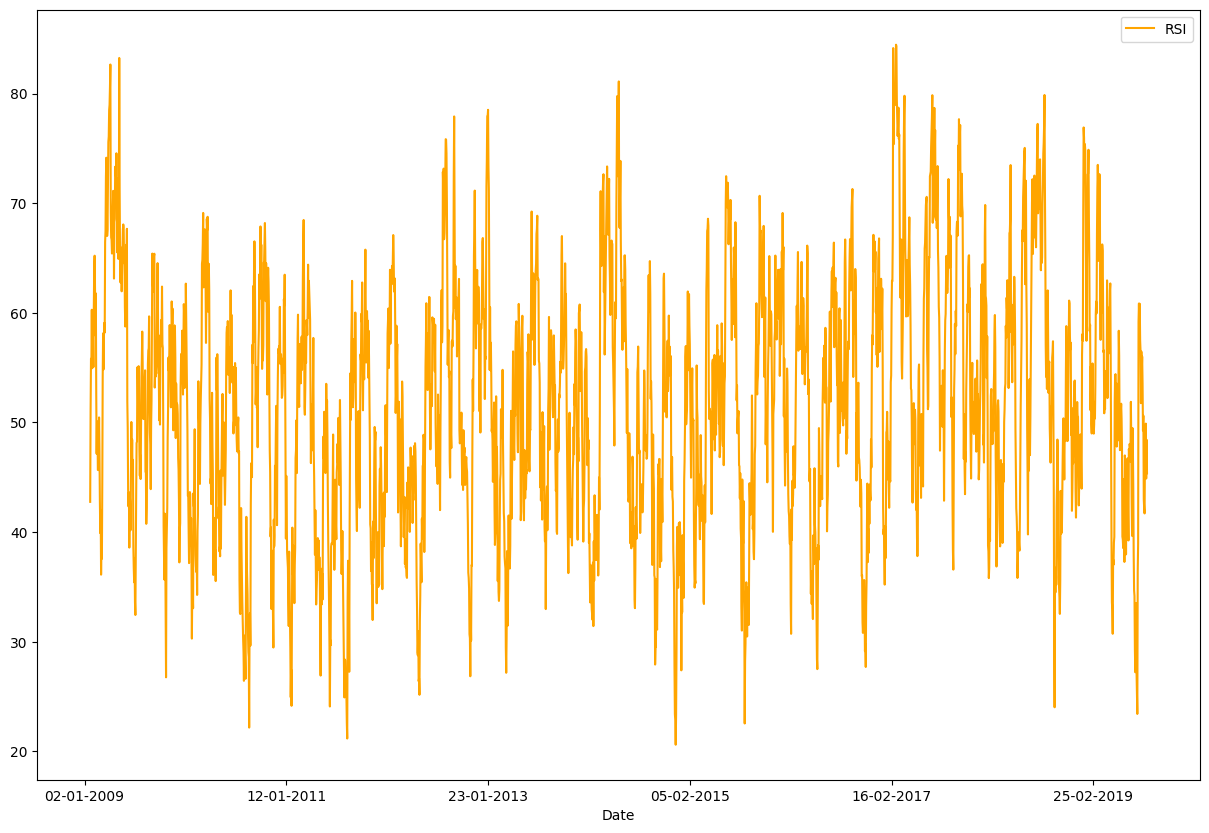

In [60]:
plt.figure(figsize=(15,10))
dataframe_reliance_stock_price['RSI'].plot(label='RSI', color='orange')
plt.legend()

Relative Strength Index (RSI):

Purpose: RSI is a momentum oscillator that measures the speed and change of price movements. It oscillates between 0 and 100 and is typically used to identify overbought or oversold conditions in a stock.
Interpretation: RSI values above 70 may indicate that a stock is overbought and could be due for a price correction, while RSI values below 30 may suggest oversold conditions and a potential buying opportunity.
Application: Traders often use RSI to confirm trends, identify potential reversal points, or generate buy/sell signals when combined with other technical indicators.

Williams %R:

Purpose: Williams %R, also known as Williams Percent Range, is a momentum indicator that measures overbought or oversold conditions.
Interpretation: Values range from -100 to 0, with readings above -20 considered overbought and readings below -80 considered oversold.
Application: Similar to RSI, Williams %R helps traders identify potential reversal points or assess the strength of a trend. It can be used alone or in conjunction with other indicators.

In [61]:
# setting the target column

dataframe_reliance_stock_price['Price_Rise'] = np.where(dataframe_reliance_stock_price['Close'].shift(-1) > dataframe_reliance_stock_price['Close'], 1, 0)

In [62]:
dataframe_reliance_stock_price

,High,Low,Open,Close,Volume,Adj Close,H-L,O-C,moving_average_20,moving_average_50,EWMA_12,standard_devaition_20,standard_devaition_50,RSI,Williams %R,Price_Rise
Date,,,,,,,,,,,,,,,,
02-01-2009,324.975006,313.000000,314.924988,321.600006,19847448.0,265.931763,11.975006,6.675018,NaN,NaN,321.600006,NaN,NaN,NaN,NaN,1
05-01-2009,344.250000,323.774994,324.750000,341.462006,22027876.0,282.355743,20.475006,16.712006,NaN,NaN,332.358589,NaN,NaN,NaN,NaN,1
06-01-2009,347.500000,332.812012,340.000000,342.725006,24118400.0,283.400116,14.687988,2.725006,NaN,NaN,336.404604,NaN,NaN,NaN,NaN,0
07-01-2009,346.500000,293.750000,342.250000,300.187988,34002200.0,248.226151,52.750000,-42.062012,NaN,NaN,324.972434,NaN,NaN,NaN,NaN,0
09-01-2009,302.500000,273.412994,302.500000,288.312012,37952520.0,238.405838,29.087006,-14.187988,NaN,NaN,315.011928,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
09-09-2019,1233.000000,1213.150024,1220.650024,1222.199951,5370758.0,1222.199951,19.849976,1.549927,1243.182495,1241.303999,1229.530769,41.296740,47.963099,47.116213,-51.280423,1
11-09-2019,1240.000000,1222.500000,1222.500000,1234.400024,5544468.0,1234.400024,17.500000,11.900024,1247.284998,1240.508999,1230.279886,35.461594,47.736455,49.896068,-29.261166,0
12-09-2019,1240.449951,1205.699951,1235.000000,1210.349976,5431139.0,1210.349976,34.750000,-24.650024,1249.697498,1239.653999,1227.213746,30.680246,47.888938,44.886984,-57.331084,1


In [63]:
# droping the missing values
print(dataframe_reliance_stock_price.isnull().sum())
dataframe_reliance_stock_price.dropna(inplace=True)

High                      0
Low                       0
Open                      0
Close                     0
Volume                    0
Adj Close                 0
H-L                       0
O-C                       0
moving_average_20        19
moving_average_50        49
EWMA_12                   0
standard_devaition_20    19
standard_devaition_50    49
RSI                      14
Williams %R               6
Price_Rise                0
dtype: int64


<Axes: >

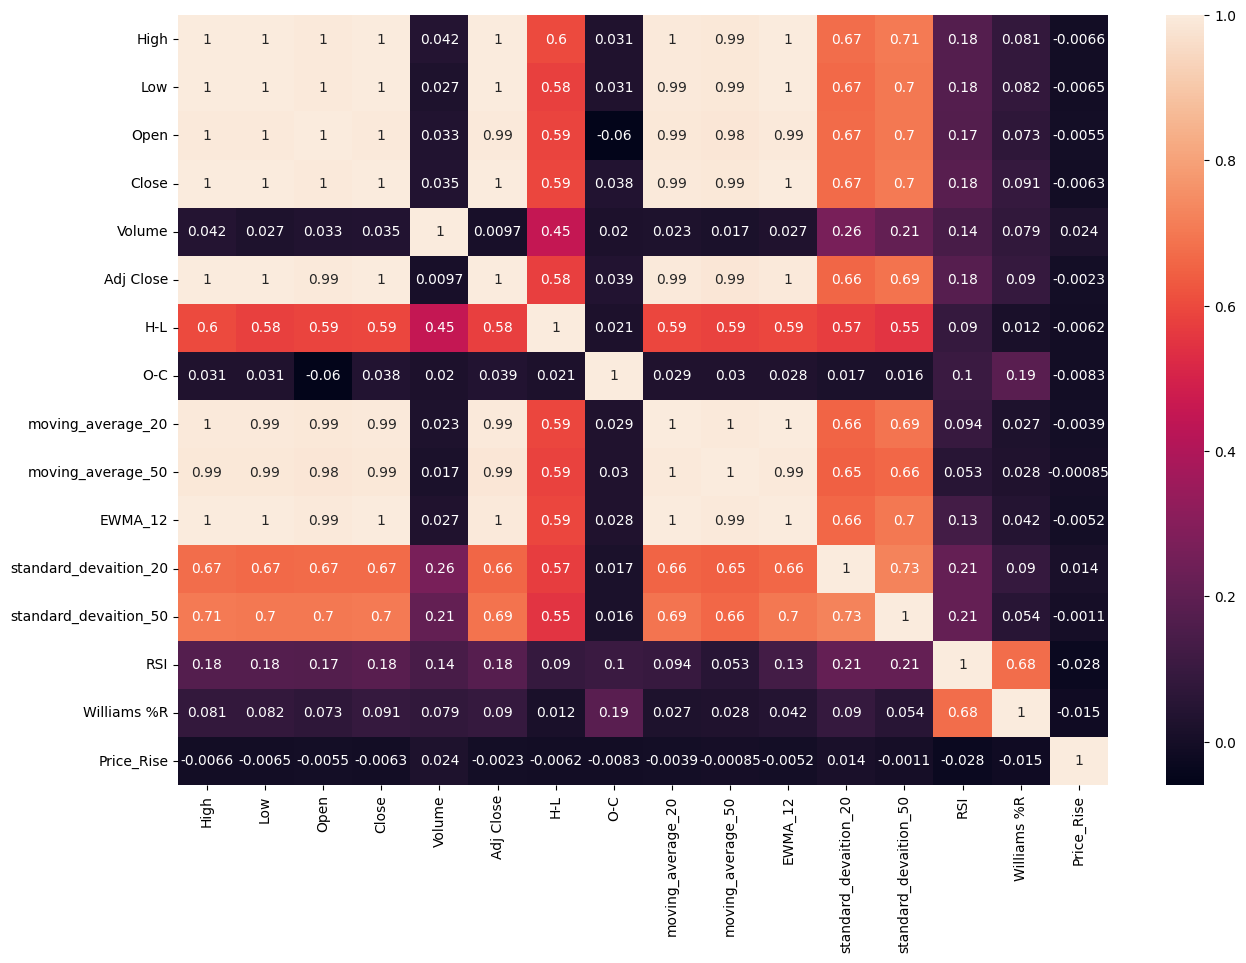

In [64]:
# displaying the correlation between different features of the dataset

plt.figure(figsize=(15,10))
correaltion=dataframe_reliance_stock_price.corr()
sns.heatmap(data=correaltion,annot=True)


In [65]:
# dividing the dataset into train and test sets
X = dataframe_reliance_stock_price.iloc[:, :-1]
y = dataframe_reliance_stock_price.iloc[:, -1]
    
split = int(len(dataframe_reliance_stock_price)*0.8)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [66]:
# scaling the feature of the train dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [67]:
from sklearn import svm
from sklearn import metrics

In [68]:
X.isnull().sum()

High                     0
Low                      0
Open                     0
Close                    0
Volume                   0
Adj Close                0
H-L                      0
O-C                      0
moving_average_20        0
moving_average_50        0
EWMA_12                  0
standard_devaition_20    0
standard_devaition_50    0
RSI                      0
Williams %R              0
dtype: int64

In [69]:
# Model with linear Kernel
SVM_LINEAR_CLF = svm.SVC(kernel = 'linear')
SVM_LINEAR_CLF.fit(X_train, y_train)


confidence = SVM_LINEAR_CLF.score(X_test, y_test)
print('accuracy:',confidence)


predictions = SVM_LINEAR_CLF.predict(X_test)

accuracy: 0.49709864603481624


In [70]:
print("Classification report of linear classifiers: \n",metrics.classification_report(y_test,predictions))

Classification report of linear classifiers: 
               precision    recall  f1-score   support

           0       0.49      0.54      0.51       253
           1       0.51      0.45      0.48       264

    accuracy                           0.50       517
   macro avg       0.50      0.50      0.50       517
weighted avg       0.50      0.50      0.50       517



In [71]:
# model with polynomial kernel
SVM_POLYNOMIAL_CLF = svm.SVC(kernel = 'poly')
SVM_POLYNOMIAL_CLF.fit(X_train, y_train)

confidence = SVM_POLYNOMIAL_CLF.score(X_test, y_test)
print('accuracy:',confidence)

predictions_polynomial = SVM_POLYNOMIAL_CLF.predict(X_test)


accuracy: 0.5299806576402321


In [72]:
print("Classification report of linear classifiers: \n",metrics.classification_report(y_test,predictions_polynomial))

Classification report of linear classifiers: 
               precision    recall  f1-score   support

           0       0.51      0.74      0.61       253
           1       0.57      0.33      0.42       264

    accuracy                           0.53       517
   macro avg       0.54      0.53      0.51       517
weighted avg       0.54      0.53      0.51       517



In [73]:
# model with RBF kernel
SVM_RBF_CLF = svm.SVC(kernel = 'rbf')
SVM_RBF_CLF.fit(X_train, y_train)

confidence = SVM_RBF_CLF.score(X_test, y_test)
print('accuracy:',confidence)

predictions_RBF = SVM_RBF_CLF.predict(X_test)

accuracy: 0.49709864603481624


In [74]:
print("Classification report of linear classifiers: \n",metrics.classification_report(y_test,predictions_RBF))

Classification report of linear classifiers: 
               precision    recall  f1-score   support

           0       0.47      0.24      0.32       253
           1       0.51      0.75      0.60       264

    accuracy                           0.50       517
   macro avg       0.49      0.49      0.46       517
weighted avg       0.49      0.50      0.46       517

